In [124]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

In [125]:
# Load dataset
vocab_size = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

In [126]:
# Pad sequences
max_len = 200
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

In [127]:
# Build model
model = Sequential([
    Embedding(vocab_size, 32, input_length=max_len),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [128]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [129]:
# Train model
model.fit(x_train, y_train, epochs=2, batch_size=64, validation_split=0.2)

Epoch 1/2
313/313 ━━━━━━━━━━━━━━━━━━━━ 47s 142ms/step - accuracy: 0.6395 - loss: 0.5956 - val_accuracy: 0.8586 - val_loss: 0.3436
Epoch 2/2
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 134ms/step - accuracy: 0.9008 - loss: 0.2519 - val_accuracy: 0.8738 - val_loss: 0.3255


In [130]:
# Predict on test set
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step


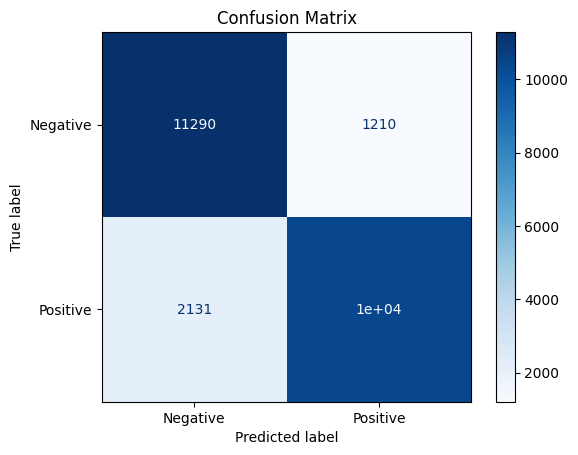

In [131]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()